In [1]:
# Импортируем модули и библиотеки
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from keras.datasets import fashion_mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential  # Модель нейронной сети, где слои идут друг за другом
from tensorflow.keras.layers import Dense, Dropout    # Слои будут полносвязными
from tensorflow.keras import utils # Переводят данные в подходящий для keras формат



In [2]:
# делим датасет на обучающую и тестовую выборку
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Имена классов не включены в набора данных, поэтому их надо прописать
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Sneaker', 'Ankle boot']

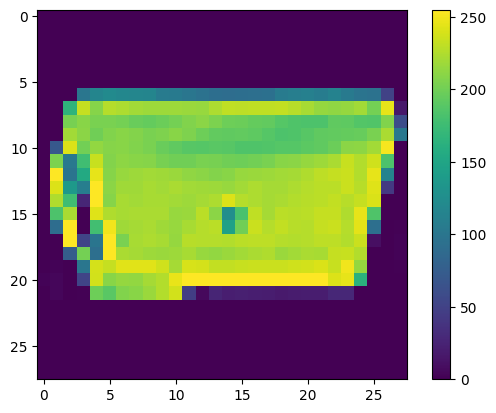

In [4]:
# Предварительная обработка данных, перед тем как создать нейросеть
# Необходимо посмотреть как выглядит изображение
plt.figure()
plt.imshow(x_train[110])
plt.colorbar()
plt.grid(False)

# 59999

In [5]:
# нормализация данных (0,1)
x_train = x_train / 255
x_test = x_test / 255

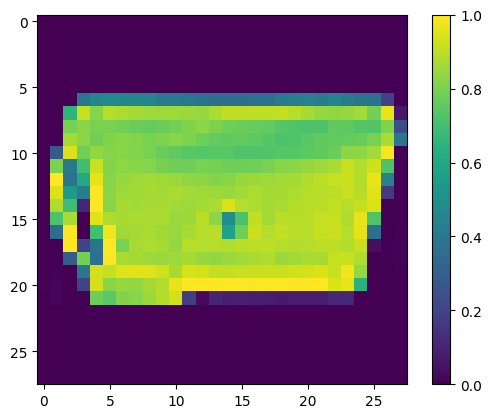

In [6]:
plt.figure()
plt.imshow(x_train[110])
plt.colorbar()
plt.grid(False)

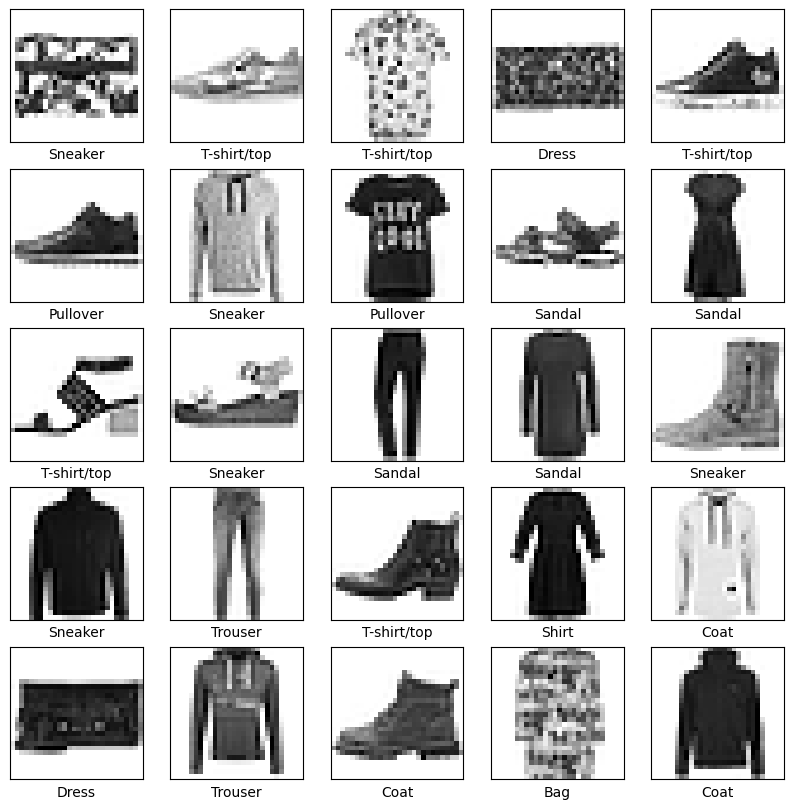

In [7]:
# Вывод нескольких изображений
plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i+10000], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [8]:
# Создание нейросети. В них основным строительным блоком является слой. Задача - объединение простых слоёв
model = keras.Sequential([        # Слои в модели идут последовательно
                          keras.layers.Flatten(input_shape=(28,28)), # Преобразует формат двумерного изображения в одномерный массив, то есть изображение будет поступать как строка в 784 пикс.Размерность входного слоя определяется формой входных данных
                          keras.layers.Dense(128, activation='relu'), # Входной полносвязный. задаётся количество нейронов и функция активации. В каждый нейрон будут поступать все 784 пикселя от каждого изображения  
                          keras.layers.Dense(10, activation='softmax') # Выходной, полносвязный слой из 10 нейронов (кол-во классов). softmax, благодаря нему возращается массив из 10 вероятностей
                                                                                                
])

c:\Users\Ktulh\OneDrive\Рабочий стол\Хайрулин\ЛР_1-5_ИВТАПБ-41_Меховников\lab6\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#  Компеляция модели - небольшие настройки. При компиляции модели указываются параметры обучения
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# optimize = Стахостический градиентный спуск  (adam)
# loss = категориально-перекресная интропия, данная функция ошибки хорошо работает в задачах классификации, классов > 2
# metrincs - параметр качества = доля правильных ответов

In [10]:
model.summary() # параематеры модели 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Обучение модели
model.fit(x_train, y_train, epochs=20)
# С помощью функции fit происходит обучение
# В функцию передаём обучающую выборку и правильные ответы
# Эпоха - колиство проходов датасета через модель 

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.8732 - loss: 0.3640
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.8740 - loss: 0.3562
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8745 - loss: 0.3578
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8802 - loss: 0.3477
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8800 - loss: 0.3414
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8807 - loss: 0.3394
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8846 - loss: 0.3298
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8857 - loss: 0.3221
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8850 - loss: 0.3275
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8903 - loss: 0.3111
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8886 - loss: 0.3149
Epoch 12/20
1875/1875 ━━━━

In [20]:
# проверка точности предсказания
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Проверка точности: ", test_acc )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.8751 - loss: 0.3519
Проверка точности:  0.8747000098228455


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Ответ модели: 5. Sandal
Правильный ответ: 4. Coat


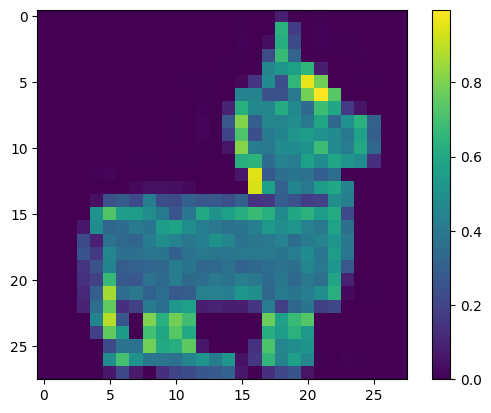

In [23]:
f = 1300

predictions = model.predict(x_train)
print(f'Ответ модели: {np.argmax(predictions[f])}. {class_names[np.argmax(predictions[f])]}')
print(f'Правильный ответ: {y_train[f]}. {class_names[y_train[f]]}')

plt.figure()
plt.imshow(x_train[f])
plt.colorbar()
plt.grid(False)


In [24]:
model.save('fashion_mnist_model.h5')